## Markov-Chain Monte-Carlo

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.interpolate as interpolate
import scipy.stats as stats

In [4]:
def X_pdf(x): return np.exp(-.5*x**2) / np.sqrt(2*np.pi)

In [5]:
def mcmc(pdf, a0, N, sigma_proposal=1.0):
    # Dimension of the parameter space
    M = a0.shape[0]
    # Setup arrays for storing the chain
    chain = np.zeros((N, M))
    pdfs = np.zeros(N)
    accepts = np.zeros(N, dtype=np.bool)
    # Initialize chain
    chain[0,:], pdfs[0], accepts[0] = a0, pdf(a0), True
    # Setup proposal distribution
    G = stats.multivariate_normal(np.zeros(M), np.eye(M) * sigma_proposal**2)
    Y = stats.uniform(0,1)
    # Iterate
    for i in range(1,N):
        # Draw sample from proposal distribution (and shift mean)
        a_proposed = G.rvs() + chain[i-1]
        pdf_proposed = pdf(a_proposed)
        # Draw from Y ~ Uniform(0,1)
        y = Y.rvs()
        # Accept or reject
        if y < pdf_proposed / pdfs[i-1]:  # ACCEPT
            chain[i] = a_proposed
            pdfs[i] = pdf_proposed
            accepts[i] = True
        else:   # REJECT
            chain[i] = chain[i-1]
            pdfs[i] = pdfs[i-1]
            accepts[i] = False        
    print(f'Acceptance ratio = {np.sum(accepts)/N*100:.2g}%')
    return chain

Acceptance ratio = 49%


Text(0, 0.5, 'Density')

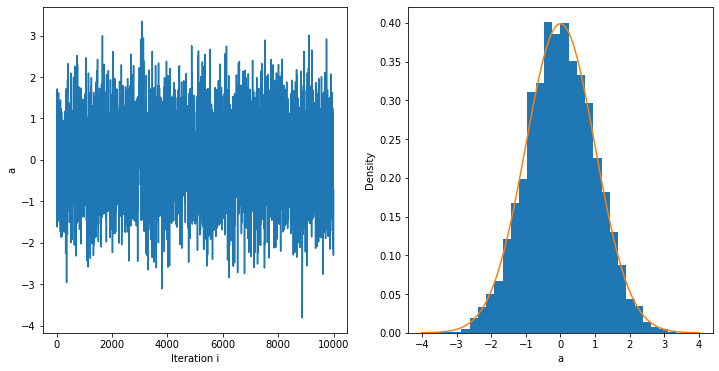

In [12]:
N = 10000
chain = mcmc(X_pdf, np.array([1])*0, N, sigma_proposal=2)
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(chain)
plt.xlabel('Iteration i'); plt.ylabel('a')
plt.subplot(122)
plt.hist(chain, density=True, bins=30)
xx = np.linspace(-4,4,101)
plt.plot(xx, X_pdf(xx), '-')
plt.xlabel('a'); plt.ylabel('Density')

In [13]:
def Xmultid_pdf(x): 
    P = np.array([[6,-2],[-2,1]])
    mu = np.array([2,1])
    return stats.multivariate_normal(mu, P).pdf(x)

Acceptance ratio = 21%


Text(0, 0.5, '$a_2$')

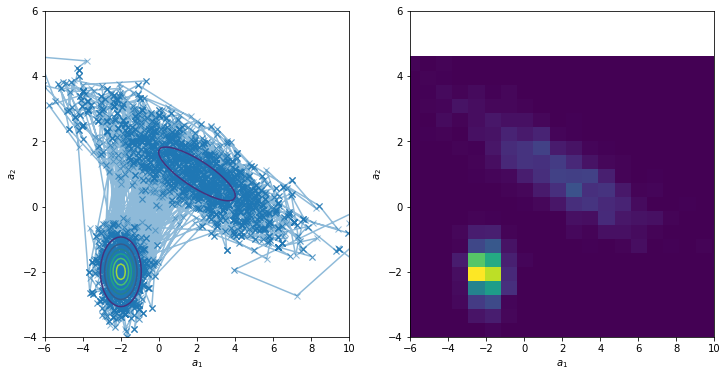

In [25]:
a0 = np.array([0,0])
N = 10000
pdf = Xmultipeak_pdf
chain = mcmc(pdf, a0, N, sigma_proposal=2)

# Plot the chain
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(chain[:,0], chain[:,1], '-x', alpha=0.5)

# Plot the PDF
xx, yy = np.linspace(-6, 10, 101), np.linspace(-4, 6, 101)
XX, YY = np.meshgrid(xx, yy)
ZZ = pdf(np.stack((XX[:,:], YY[:,:]), axis=-1) )
plt.contour(XX, YY, ZZ, zorder=999)
plt.xlim(-6, 10); plt.ylim(-4, 6)
plt.xlabel(r'$a_1$'); plt.ylabel(r'$a_2$')

# Plot a histogram
plt.subplot(122)
a = plt.hist2d(chain[:,0], chain[:,1], bins=20, density=True)
plt.xlim(-6, 10); plt.ylim(-4, 6)
plt.xlabel(r'$a_1$'); plt.ylabel(r'$a_2$')

In [20]:
def Xmultipeak_pdf(x): 
    P1 = np.array([[6,-2],[-2,1]])
    mu1 = np.array([2,1])
    P2 = np.array([[0.3,0],[0,0.3]])
    mu2 = np.array([-2,-2])
    return stats.multivariate_normal(mu1, P1).pdf(x) + stats.multivariate_normal(mu2, P2).pdf(x)